In [1]:
import pandas as pd
import math
import numpy as np
from plotnine import * 
from plotnine.data import mtcars

In [2]:
df = pd.read_csv('MAST_global_met_vs_primary.csv')
df = df.rename(columns={"Unnamed: 0" : "gene"})
df

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,NPY1R,3.857209e-36,-6.323724e-01,0.072,0.262,1.313032e-31
1,S100A16,6.483529e-28,7.933317e-01,0.849,0.790,2.207058e-23
2,MGP,1.064730e-27,-1.750883e+00,0.430,0.617,3.624449e-23
3,PTN,5.005640e-27,-6.366534e-01,0.009,0.124,1.703970e-22
4,MALAT1,2.292667e-25,-1.134872e+00,0.758,0.842,7.804468e-21
...,...,...,...,...,...,...
34036,AC139769.3,9.999304e-01,8.969174e-05,0.004,0.004,1.000000e+00
34037,AC002546.1,9.999739e-01,-7.582404e-07,0.003,0.003,1.000000e+00
34038,AC090983.1,9.999862e-01,8.141978e-05,0.003,0.003,1.000000e+00
34039,IL6RP1,1.000000e+00,0.000000e+00,0.000,0.000,1.000000e+00


In [3]:
df['-log10(p_val)'] = [-math.log10(i) for i in df['p_val']]
df['-log10(p_val_adj)'] = [-math.log10(i) for i in df['p_val_adj']]
df

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,-log10(p_val),-log10(p_val_adj)
0,NPY1R,3.857209e-36,-6.323724e-01,0.072,0.262,1.313032e-31,35.413727,30.881725
1,S100A16,6.483529e-28,7.933317e-01,0.849,0.790,2.207058e-23,27.188189,22.656186
2,MGP,1.064730e-27,-1.750883e+00,0.430,0.617,3.624449e-23,26.972760,22.440758
3,PTN,5.005640e-27,-6.366534e-01,0.009,0.124,1.703970e-22,26.300540,21.768538
4,MALAT1,2.292667e-25,-1.134872e+00,0.758,0.842,7.804468e-21,24.639659,20.107657
...,...,...,...,...,...,...,...,...
34036,AC139769.3,9.999304e-01,8.969174e-05,0.004,0.004,1.000000e+00,0.000030,-0.000000
34037,AC002546.1,9.999739e-01,-7.582404e-07,0.003,0.003,1.000000e+00,0.000011,-0.000000
34038,AC090983.1,9.999862e-01,8.141978e-05,0.003,0.003,1.000000e+00,0.000006,-0.000000
34039,IL6RP1,1.000000e+00,0.000000e+00,0.000,0.000,1.000000e+00,-0.000000,-0.000000


In [4]:
df['label'] = np.where(df['avg_log2FC'] >= 0.5, "met", "not sig")
df.loc[df['avg_log2FC'] <= -0.5, 'label'] = 'primary'
df.loc[df['p_val'] > 0.05, 'label'] = 'not sig'
cat_order = ['met', 'not sig', 'primary']
df['label'] = pd.Categorical(df['label'], categories=cat_order, ordered=True)

In [5]:
df_filtered = df[df['p_val'] < 0.05].copy()
df_filtered_up = df_filtered[df_filtered['avg_log2FC'] > 0.5].sort_values(by='avg_log2FC', ascending=False)[:10]
df_filtered_down = df_filtered[df_filtered['avg_log2FC'] < -0.5].sort_values(by='avg_log2FC', ascending=True)[:10]
df_filtered_goi = df[df['gene'].isin(['KRT5', 'KRT6B', 'KRT14', 'KRT17', 'KRT81', 'S100A16', 'S100A14','TSPAN1','CEACAM6','KLK6', 'KLK7'])]
combined_df_filtered = pd.concat([df_filtered_up, df_filtered_down,df_filtered_goi])
combined_df_filtered

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,-log10(p_val),-log10(p_val_adj),label
26,CEACAM6,1.695393e-16,2.426701,0.127,0.035,5.771287e-12,15.770730,11.238727,met
248,KRT14,1.680408e-08,1.417917,0.214,0.206,5.720276e-04,7.774585,3.242583,met
94,PSCA,3.039017e-11,1.243731,0.242,0.169,1.034512e-06,10.517267,5.985265,met
43,CGA,1.035044e-14,1.117621,0.124,0.032,3.523393e-10,13.985041,9.453039,met
813,KLK6,1.665848e-05,1.099654,0.191,0.153,5.670715e-01,4.778365,0.246362,met
267,KRT6B,3.003095e-08,1.026361,0.135,0.078,1.022284e-03,7.522431,2.990429,met
76,TSPAN1,4.431820e-12,0.964756,0.262,0.172,1.508636e-07,11.353418,6.821416,met
10,S100A14,2.447973e-21,0.959422,0.689,0.649,8.333145e-17,20.611193,16.079191,met
1452,KLK7,2.652238e-04,0.959268,0.160,0.100,1.000000e+00,3.576388,-0.000000,met
4374,KRT17,1.235852e-02,0.892021,0.186,0.136,1.000000e+00,1.908034,-0.000000,met


In [6]:
combined_df_filtered = combined_df_filtered.drop_duplicates()
combined_df_filtered

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,-log10(p_val),-log10(p_val_adj),label
26,CEACAM6,1.695393e-16,2.426701,0.127,0.035,5.771287e-12,15.770730,11.238727,met
248,KRT14,1.680408e-08,1.417917,0.214,0.206,5.720276e-04,7.774585,3.242583,met
94,PSCA,3.039017e-11,1.243731,0.242,0.169,1.034512e-06,10.517267,5.985265,met
43,CGA,1.035044e-14,1.117621,0.124,0.032,3.523393e-10,13.985041,9.453039,met
813,KLK6,1.665848e-05,1.099654,0.191,0.153,5.670715e-01,4.778365,0.246362,met
267,KRT6B,3.003095e-08,1.026361,0.135,0.078,1.022284e-03,7.522431,2.990429,met
76,TSPAN1,4.431820e-12,0.964756,0.262,0.172,1.508636e-07,11.353418,6.821416,met
10,S100A14,2.447973e-21,0.959422,0.689,0.649,8.333145e-17,20.611193,16.079191,met
1452,KLK7,2.652238e-04,0.959268,0.160,0.100,1.000000e+00,3.576388,-0.000000,met
4374,KRT17,1.235852e-02,0.892021,0.186,0.136,1.000000e+00,1.908034,-0.000000,met


In [7]:
p = (ggplot(df) 
    + geom_point(aes(x='avg_log2FC', y='-log10(p_val)', color='label'), size=0.5) 
    + scale_color_manual(['#377eb8', 'gray', '#ff7f00']) 
    + geom_text(combined_df_filtered,aes(x='avg_log2FC', y='-log10(p_val)', label='gene'),
                size = 4, color='black', 
                adjust_text={'expand_points': (2, 5), 'arrowprops' : {'arrowstyle' : '-','color': 'black'}}) 
    + theme(plot_background=element_rect(fill='white', alpha=.3),
            panel_grid_major_y=element_blank(), panel_grid_minor_y=element_blank(),
            panel_grid_major_x=element_blank(), panel_grid_minor_x=element_blank(), 
            panel_background=element_rect(fill='white', alpha=.2),
            panel_border=element_rect(color='black', size=0.3),
            figure_size=(3, 2)))

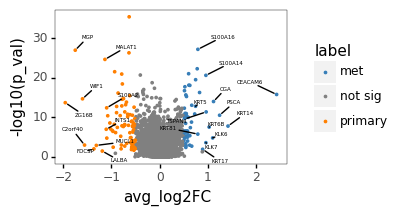

<ggplot: (8778564272656)>

In [8]:
p

In [9]:
save_as_pdf_pages([p],'SS2_met_vs_primary_global_volcano_plot_top_10_plus_GOI_2X3_dot0.5_text4_border_0.3_ref.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: SS2_met_vs_primary_global_volcano_plot_top_10_plus_GOI_2X3_dot0.5_text4_border_0.3_ref.pdf


In [10]:
p_no_labels = (ggplot(df) 
                + geom_point(aes(x='avg_log2FC', y='-log10(p_val)', color='label'), size=0.5) 
                + scale_color_manual(['#377eb8', 'gray', '#ff7f00']) 
                + geom_text(combined_df_filtered, aes(x='avg_log2FC', y='-log10(p_val)', label='gene'),
                            size = 4, color='black',
                            adjust_text={'expand_points': (2, 5), 'arrowprops': {'arrowstyle': '-','color': 'black'}}) 
                + theme(plot_background=element_rect(fill='white', alpha=0.3),
                        panel_grid_major_y=element_blank(), panel_grid_minor_y=element_blank(),
                        panel_grid_major_x=element_blank(), panel_grid_minor_x=element_blank(),
                        panel_background=element_rect(fill='white', alpha=.2),
                        panel_border=element_rect(color='black', size=0.3),
                        axis_text_x=element_blank(), axis_title_y=element_blank(),
                        axis_title_x=element_blank(), axis_text_y=element_blank(),
                        axis_ticks_minor_x=element_blank(), axis_ticks_minor_y=element_blank(), 
                        figure_size=(3, 2)) 
                + guides(color = None))


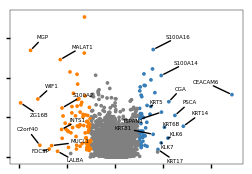

<ggplot: (8779519124444)>

In [11]:
p_no_labels

In [12]:
save_as_pdf_pages([p_no_labels],'SS2_met_vs_primary_global_volcano_plot_top_10_plus_GOI_2X3_dot0.5_text4_border_0.3.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: SS2_met_vs_primary_global_volcano_plot_top_10_plus_GOI_2X3_dot0.5_text4_border_0.3.pdf
